<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 12 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Détectez des faux billets avec Python
</h2>
    <h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">1ère partie : Comparaison d'algorithmes</h2>
</div>

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Étape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [103]:
#Importation de la librairie Pandas
import pandas as pd

#Importation de la librairie NumPy
import numpy as np
from numpy import sqrt as  sqrt

#Importation de ... pyplot de la librairie matplotlib
import matplotlib.pyplot as plt

#Importation de la librairie seaborn
import seaborn as sns

import plotly.express as px

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import model_selection
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate

from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, accuracy_score,\
                            confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier

from sklearn import preprocessing,decomposition,cluster, neighbors, metrics

from sklearn.cluster import KMeans

import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy.stats import shapiro #t,

from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels

pd.options.mode.copy_on_write = True

import warnings
warnings.filterwarnings("ignore")

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement du fichier de données</h3>
</div>

In [3]:
#Importation du fichier Billets.csv
df_billets = pd.read_csv('Billets.csv', sep = ';')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire et nettoyage des données </h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire</h3>
</div>

In [5]:
df_billets

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [7]:
df_billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [9]:
# Vérification des doublons
print("Il y a {} doublons dans les données".format(df_billets.duplicated().sum()))

Il y a 0 doublons dans les données


**Vérifions le nombre de vrais et faux billets**

In [11]:
df_billets.value_counts("is_genuine")

is_genuine
True     1000
False     500
Name: count, dtype: int64

**Il y a 1000 vrais billets et 500 faux billets**

**La colonne** *"margin_low"* **comporte des valeurs manquantes**

**Regardons combien concernent les vrais et faux billets**

In [13]:
df_billets[df_billets["margin_low"].isna()].value_counts("is_genuine")

is_genuine
True     29
False     8
Name: count, dtype: int64

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse bivariée</h3>
</div>

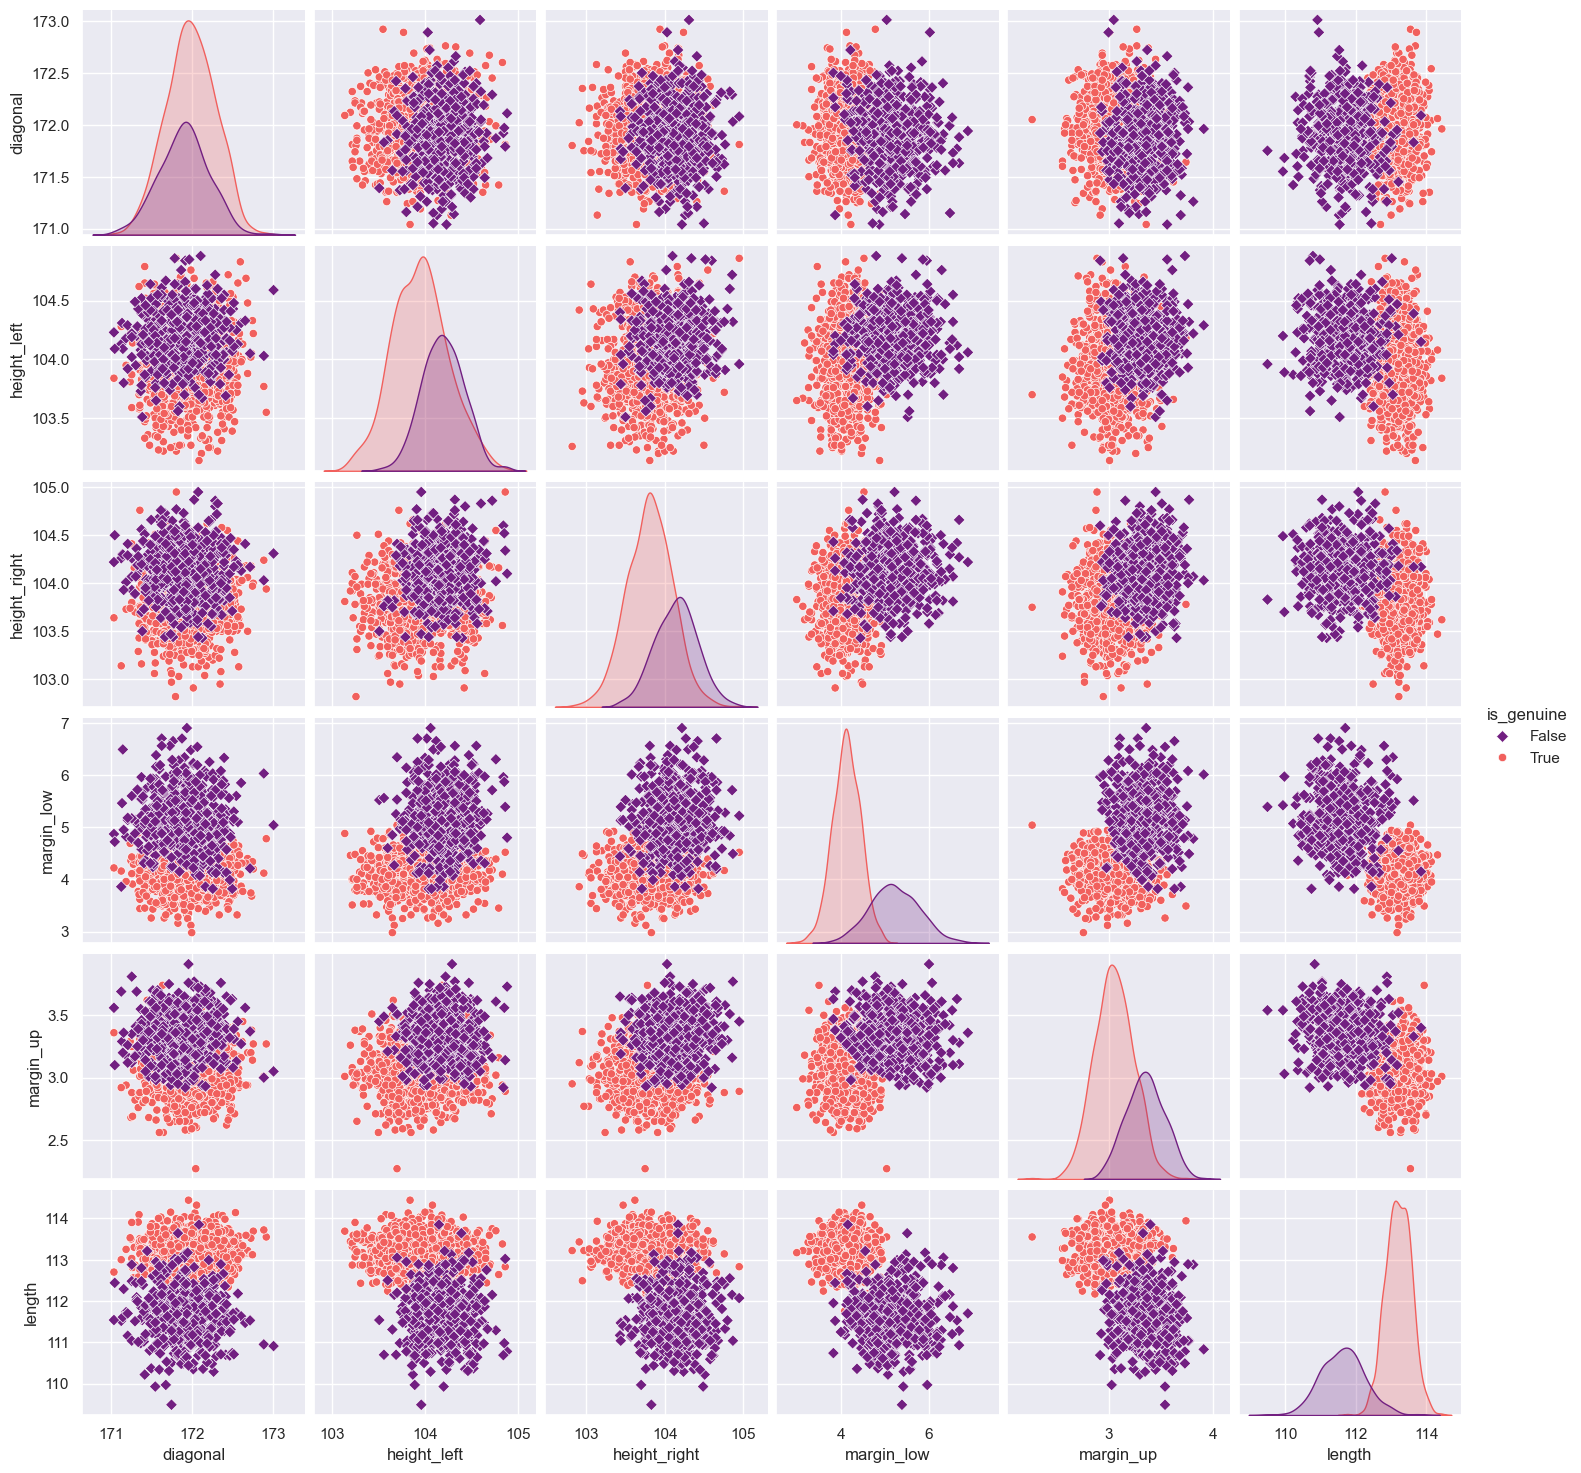

In [15]:
sns.set()
sns.pairplot(df_billets,hue='is_genuine', palette = "magma",markers=["D", "o"])

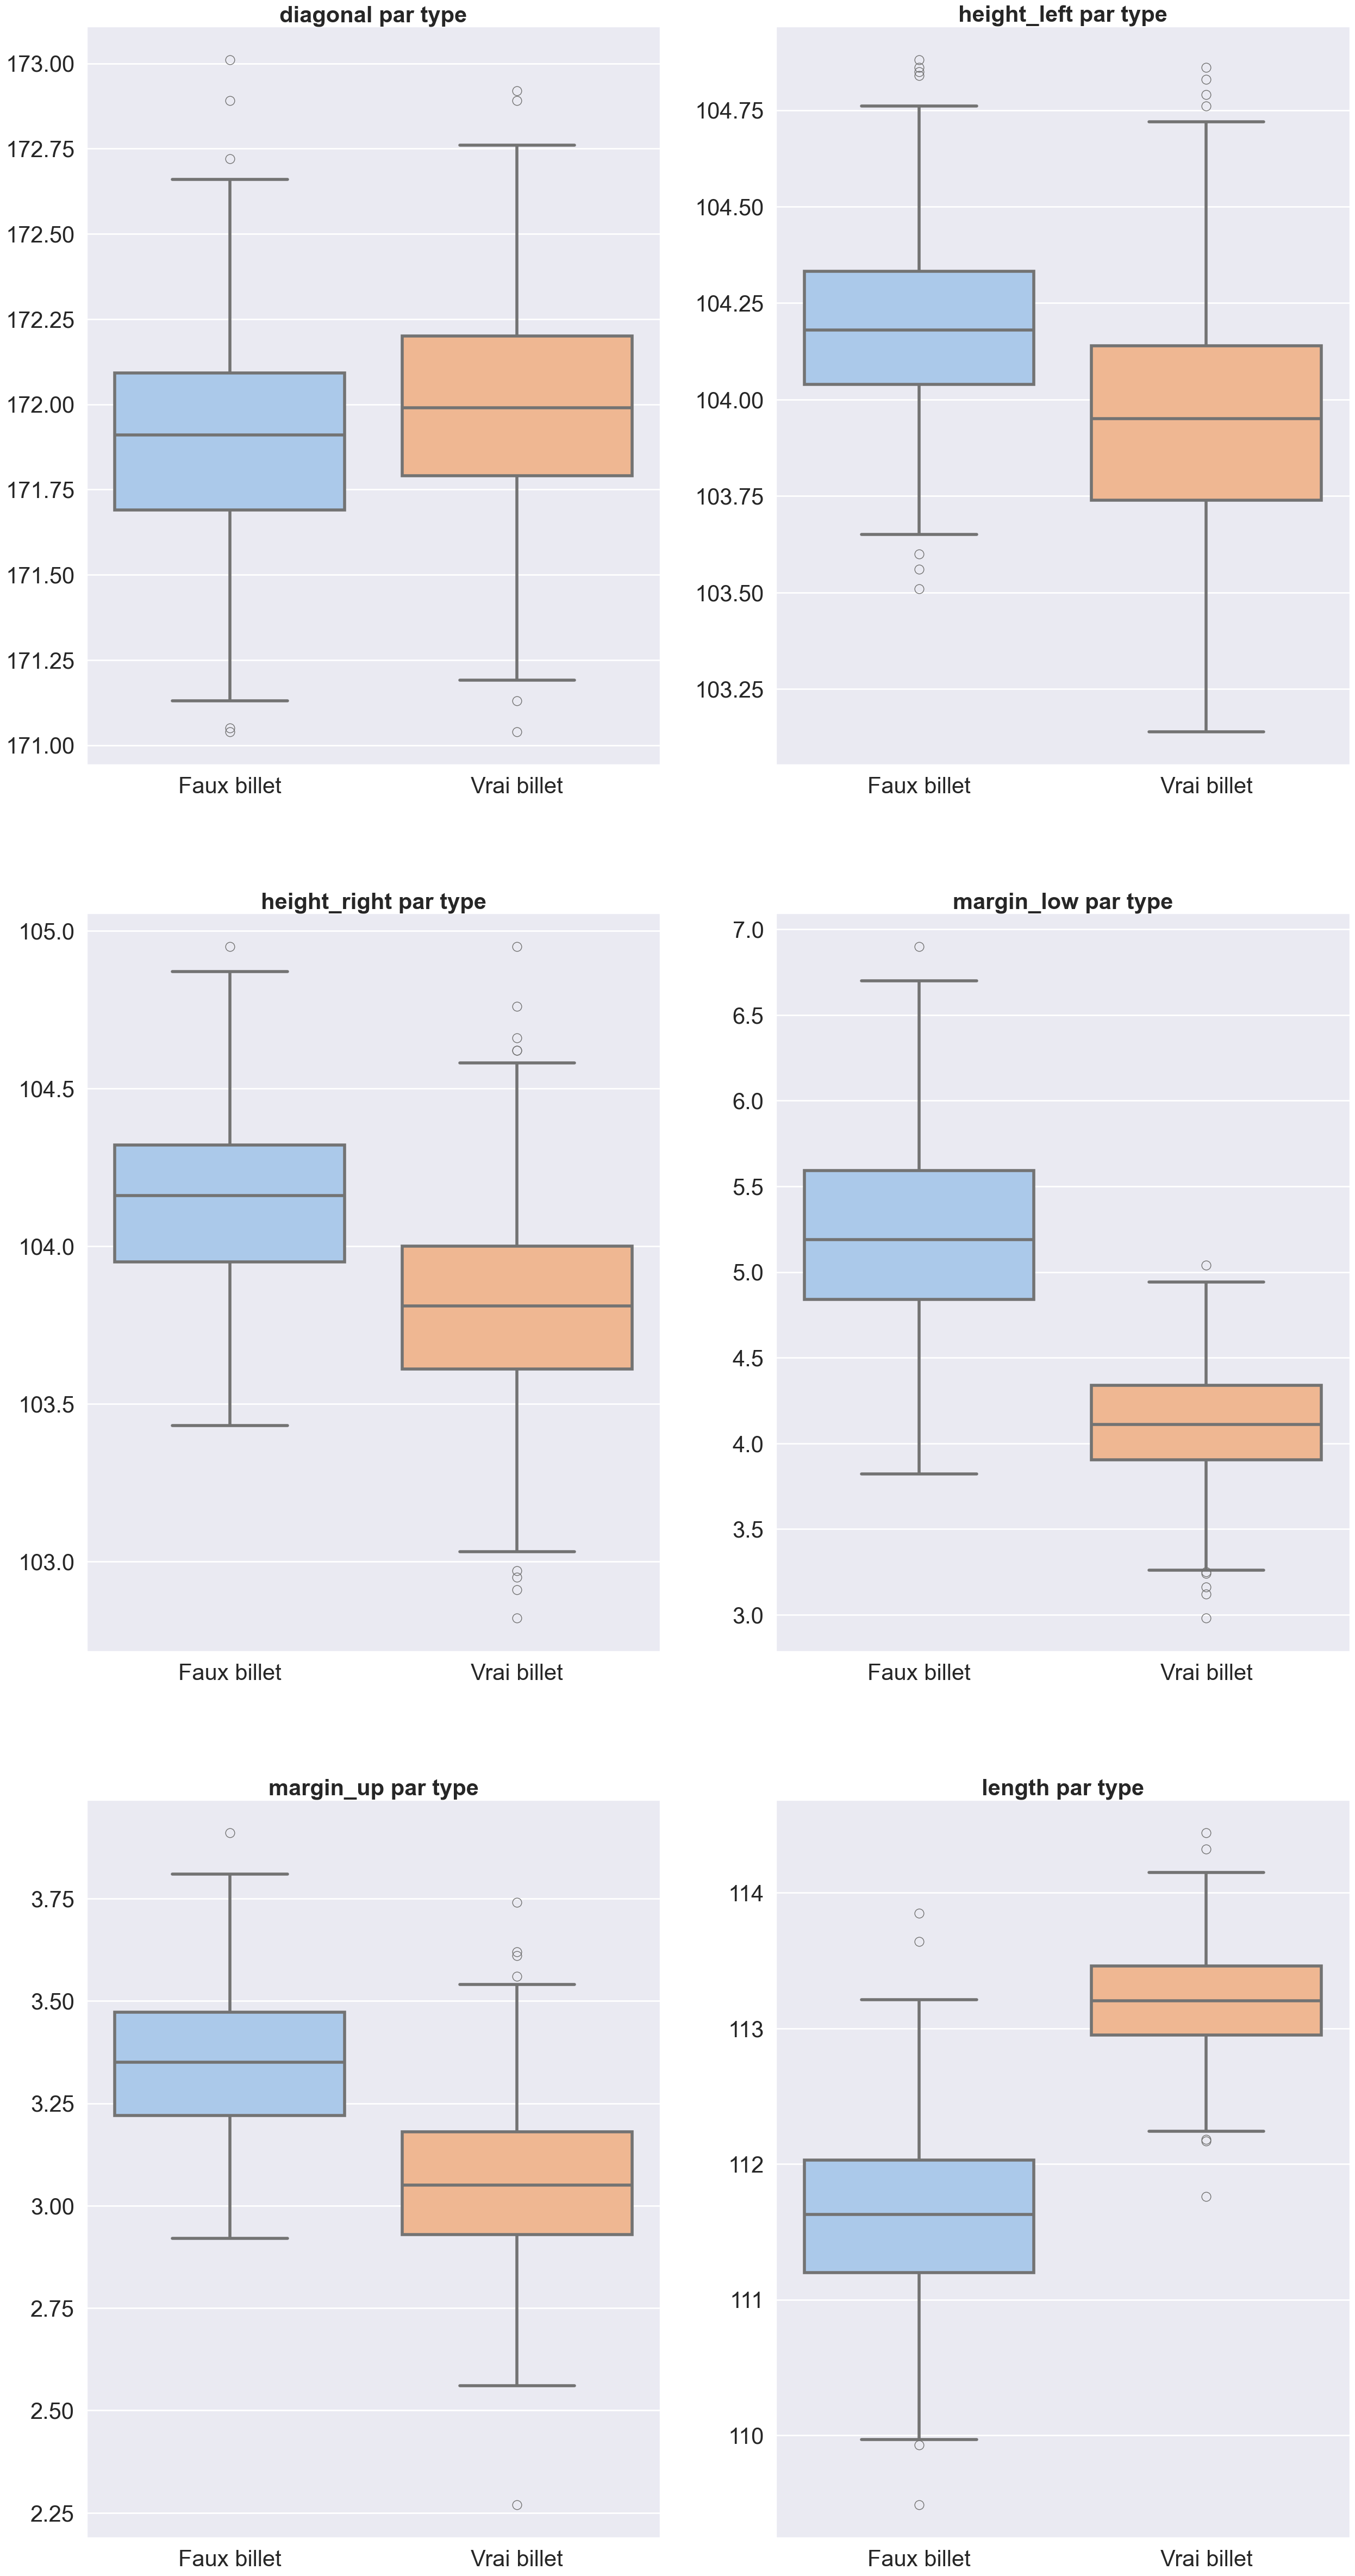

In [17]:
#Création d'une Boite à moustaches 
feature = df_billets.columns
nb_feat = df_billets.shape[1]
rows = 3

sns.set()
sns.set_context("poster")

plt.subplots(rows,2,figsize=(30, 60))

#Boxplots sur la totalité des données
for i in range(1,nb_feat) :
    plt.subplot(rows,2,i)
    sns.boxplot(data=df_billets, x="is_genuine",y=feature[i], hue = "is_genuine", palette = "pastel",
                legend=False,linewidth=4)
    plt.title("{} par type".format(feature[i]),fontsize =30,fontweight='bold')
    plt.ylabel('')
    plt.xlabel('')
    plt.yticks(fontsize =30)
    plt.xticks(ticks =[0,1],labels = ["Faux billet","Vrai billet"],fontsize =30)
    x=+1

plt.show()

**Les dimensions pour lesquelles on observe une différence plus marquée par type de billet sont *length* et *margin-low***

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Matrice des corrélations</h3>
</div>

<Axes: title={'center': 'Matrice des corrélations'}>

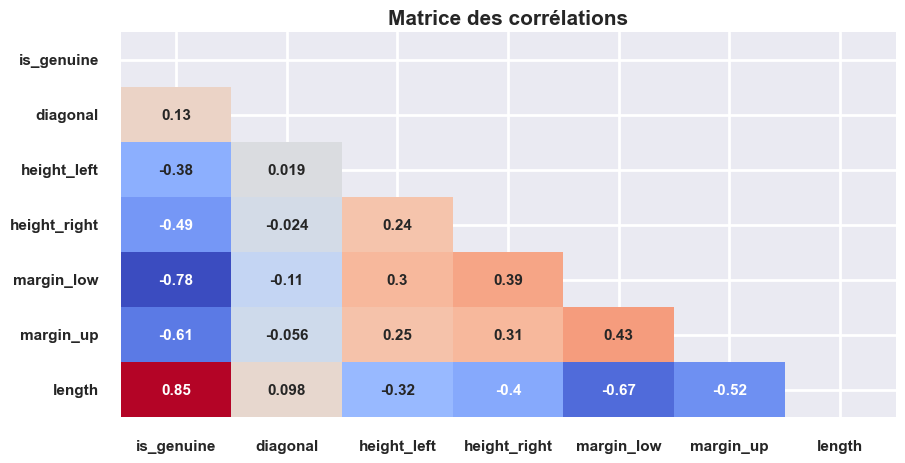

In [19]:
corr = df_billets.corr()
#Affichage de la matrice des corrélations en heatmap
fig, ax = plt.subplots(figsize=(10, 5))
plt.rcParams.update({'font.size': 11,'font.weight':'bold'})
plt.title ("Matrice des corrélations",fontsize = 15,fontweight ='bold')
plt.xticks (fontsize = 11,fontweight ='bold')
plt.yticks (fontsize = 11,fontweight ='bold')
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, cmap='coolwarm', annot = True, mask = mask,cbar =0)

**Commentaires :** *Margin_low* semble avoir une forte corrélation avec *is_genuine* et *length*. Mais on ne sait pas si c'est propre à l'échantillon.

La comparaison des différents modèles de regression linéaire mutliple permettra de tester cette hypothèse

**NB :** On constate que la variable *is_genuine* est la plus prédictive des variables pour chacune des variables d'un billet

**Intuitivement on peut aisément penser qu'en changeant une des dimensions d'un billet, d'autres vont varier *en conséquence***

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Régression linéaire multiple pour la variable margin_low </h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Régression linéaire multiple avec statsmodels</h3>
</div>

**De quoi margin_low dépend-elle le plus ? Une ou toutes les variables= comparaison des scores**

**--> Fixons un seuil pour la p-valeur à 5%**

In [21]:
#Prenons les données complètes du dataset (= sans les lignes contenant des NaN)
df = df_billets[~df_billets["margin_low"].isna()]
X = df.drop(columns="margin_low")
y = df["margin_low"]

reg_multi = smf.ols('margin_low~is_genuine+diagonal+height_left+height_right+margin_up+length', data=df).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     390.7
Date:                Thu, 12 Dec 2024   Prob (F-statistic):          4.75e-299
Time:                        10:17:28   Log-Likelihood:                -774.14
No. Observations:                1463   AIC:                             1562.
Df Residuals:                    1456   BIC:                             1599.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.8668      8

**On constate ici que certains paramètres ne sont pas significativement différents de 0, car leur p-valeur n'est pas inférieure à 5 %, le niveau de test que nous souhaitons.**

**Le R-squared vaut environ 0.617, et le R-squared ajusté est d'environ 0.615**

**On va donc maintenant retirer les variables non significatives. On commence par la moins significative : length, car elle a une p-valeur de 0.868**

In [23]:
reg_multi = smf.ols('margin_low~is_genuine+diagonal+height_left+height_right+margin_up', data=df).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     469.2
Date:                Thu, 12 Dec 2024   Prob (F-statistic):          2.12e-300
Time:                        10:17:31   Log-Likelihood:                -774.15
No. Observations:                1463   AIC:                             1560.
Df Residuals:                    1457   BIC:                             1592.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.4247      7

**Retirons la variable *diagonal* qui a une p-valeur de 0.719**

In [25]:
reg_multi = smf.ols('margin_low~is_genuine+height_left+height_right+margin_up', data=df).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     586.8
Date:                Thu, 12 Dec 2024   Prob (F-statistic):          8.76e-302
Time:                        09:52:50   Log-Likelihood:                -774.21
No. Observations:                1463   AIC:                             1558.
Df Residuals:                    1458   BIC:                             1585.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.3902      5

**Retirons la variable *height_right* qui a une p-valeur de 0.496**

In [25]:
reg_multi = smf.ols('margin_low~is_genuine+height_left+margin_up', data=df).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     782.5
Date:                Thu, 12 Dec 2024   Prob (F-statistic):          3.63e-303
Time:                        10:17:35   Log-Likelihood:                -774.45
No. Observations:                1463   AIC:                             1557.
Df Residuals:                    1459   BIC:                             1578.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9104      4

**Retirons la variable *height_left* qui a une p-valeur de 0.454**

In [27]:
reg_multi = smf.ols('margin_low~is_genuine+margin_up', data=df).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1174.
Date:                Thu, 12 Dec 2024   Prob (F-statistic):          1.24e-304
Time:                        10:17:38   Log-Likelihood:                -774.73
No. Observations:                1463   AIC:                             1555.
Df Residuals:                    1460   BIC:                             1571.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.9263      0

**-->Les paramètres is_genuine *(vrai/faux billet)* et margin_up sont significatifs dans la prédiction de margin_low**

**- R-squared = 61,7% indique qu'une assez forte partie de la variation est expliquée par le modèle**

**- R-squared ajusté quasiment identique au R-squared indique que la qualité prédictive du modèle est robuste** 

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Analyse des résultats</h3>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 18px; color: RGB(0,150,250); ">3.2.1 - Vérifier la non colinéarité des variables</h4>
</div>

In [35]:
variables = reg_multi.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.5938854494007753, 1.5938854494007744]

**Tous les coefficients sont inférieurs à 10, il n'y a donc pas de problème de colinéarité**

<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 18px; color: RGB(0,150,250); ">3.2.2 - Tester l’homoscédasticité des résidus</h4>
</div>

In [37]:
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 3.203355911582298e-36


**La p-valeur est inférieure à 5%, on rejette l'hypothèse selon laquelle les variances sont constantes (l'hypothèse d’homoscédasticité)**

<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 18px; color: RGB(0,150,250); ">3.2.3 - Tester la normalité des résidus des résidus (Test de Shapiro-Wilk)</h4>
</div>

In [39]:
shapiro(reg_multi.resid)

ShapiroResult(statistic=0.9936252795074529, pvalue=6.214446750409788e-06)

**-->l'hypothèse de normalité est remise en cause (p-value << 0.05)**

*Néanmoins, l'observation des résidus, le fait qu'ils ne soient pas très différents d'une distribution symétrique, et le fait que l'échantillon soit de taille suffisante (supérieure à 30) permettent de dire que les résultats obtenus par le modèle linéaire gaussien ne sont pas absurdes, même si le résidu n'est pas considéré comme étant gaussien :*

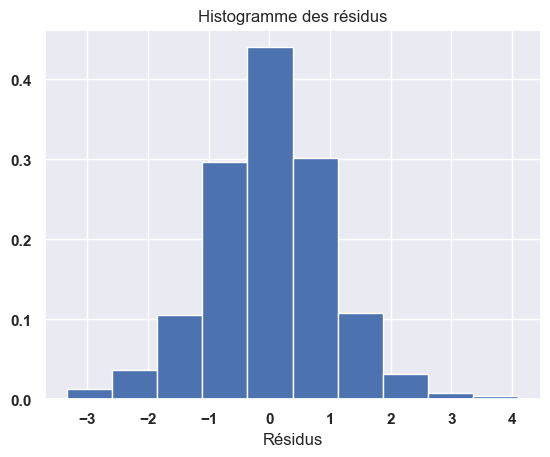

In [41]:
sns.set()
df['residu'] = reg_multi.resid
residus_std = df['residu']/sqrt(sum(df['residu']**2)/(len(df['residu'])-1))
plt.hist(residus_std, density=True)
plt.xlabel('Résidus')
plt.title('Histogramme des résidus')
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Application de la regression linéaire multiple à margin_low</h3>
</div>

In [69]:
# Prediction sur les margin_low vides
df_NaN = df_billets[df_billets["margin_low"].isna()].drop(columns="margin_low")
y_pred = reg_multi.predict(df_NaN)
y_pred

72      4.074248
99      4.097561
151     4.122994
197     3.995830
241     4.122994
251     4.137830
284     4.078487
334     4.127233
410     4.101800
413     4.093322
445     4.125114
481     4.188696
505     4.131472
611     4.063651
654     4.190815
675     4.220487
710     4.112397
739     4.108158
742     4.076367
780     4.099681
798     4.125114
844     4.129352
845     4.148427
871     4.112397
895     4.131472
919     4.216248
945     4.122994
946     4.070009
981     4.129352
1076    5.245925
1121    5.254403
1176    5.286194
1303    5.305269
1315    5.205657
1347    5.161149
1435    5.171746
1438    5.239567
dtype: float64

In [71]:
# Reconstituons les données avec les prédictions
df_NaN["margin_low"] = y_pred
df_NaN

,is_genuine,diagonal,height_left,height_right,margin_up,length,margin_low
72,True,171.94,103.89,103.45,3.25,112.79,4.074248
99,True,171.93,104.07,104.18,3.14,113.08,4.097561
151,True,172.07,103.80,104.38,3.02,112.93,4.122994
197,True,171.45,103.66,103.80,3.62,113.27,3.995830
241,True,171.83,104.14,104.06,3.02,112.36,4.122994
251,True,171.80,103.26,102.82,2.95,113.22,4.137830
284,True,171.92,103.83,103.76,3.23,113.29,4.078487
334,True,171.85,103.70,103.96,3.00,113.36,4.127233
410,True,172.56,103.72,103.51,3.12,112.95,4.101800
413,True,172.30,103.66,103.50,3.16,112.95,4.093322


In [73]:
df_complet = pd.concat([df, df_NaN])
df_complet.sort_index()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,residu
0,True,171.81,104.86,104.95,4.52,2.89,112.83,0.369454
1,True,171.46,103.36,103.66,3.77,2.99,113.09,-0.359352
2,True,172.69,104.48,103.50,4.40,2.94,113.16,0.260051
3,True,171.36,103.91,103.94,3.62,3.01,113.51,-0.505114
4,True,171.73,104.28,103.46,4.04,3.48,112.54,0.014498
...,...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28,-0.851358
1496,False,172.19,104.63,104.44,5.27,3.37,110.97,0.057985
1497,False,171.80,104.01,104.12,5.51,3.36,111.95,0.295866
1498,False,172.06,104.28,104.06,5.17,3.46,112.25,-0.022940


**Comparons le jeu de données complété avec le jeu de données initiales**

In [75]:
display(df.describe())
df_complet.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length,residu
count,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1.463000e+03
mean,171.959193,104.031333,103.921476,4.485967,3.153083,112.674757,1.351998e-15
std,0.305457,0.299605,0.324181,0.663813,0.231466,0.873222,4.110464e-01
min,171.040000,103.140000,102.910000,2.980000,2.270000,109.490000,-1.370821e+00
25%,171.750000,103.825000,103.710000,4.015000,2.990000,112.020000,-2.638627e-01
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.960000,-6.695606e-03
75%,172.170000,104.230000,104.150000,4.870000,3.315000,113.340000,2.594536e-01
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.320000,1.685866e+00


,diagonal,height_left,height_right,margin_low,margin_up,length,residu
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1.463000e+03
mean,171.958440,104.029533,103.920307,4.482863,3.151473,112.67850,1.352909e-15
std,0.305195,0.299462,0.325627,0.659849,0.231813,0.87273,4.110464e-01
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000,-1.370821e+00
25%,171.750000,103.820000,103.710000,4.027500,2.990000,112.03000,-2.638627e-01
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000,-6.695606e-03
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000,2.594536e-01
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000,1.685866e+00


**--> Les caractéristiques de margin_low sont quasi identiques, nous utiliserons les données de la regression linéaire pour la suite**

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Classification des vrais/faux billets</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.0 - Préparation des données</h3>
</div>

**Numérisons la variable *is_genuine*** :

In [77]:
df_complet.loc[df_complet["is_genuine"]==True,"is_genuine"] = 1
df_complet.loc[df_complet["is_genuine"]==False,"is_genuine"] = 0
df_complet["is_genuine"] = df_complet["is_genuine"].astype(int)
df_complet.value_counts("is_genuine")

is_genuine
1    1000
0     500
Name: count, dtype: int64

In [79]:
df_complet = df_complet.drop(columns = "residu")
df_complet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 0 to 1438
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   int64  
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 93.8 KB


**Séparons nos données en un jeu d’entraînement et un jeu de test. Le jeu de test contiendra 20% des données**

In [81]:
#Enregistrons le dataset complet dans un fichier pour entrainer le modèle sélectionné ultérieurement
df_complet.to_csv("Data_entrainement.csv",index = False)
#Créons les dataset d'entainement et de test utilsés pour tous les modèles
X = df_complet.drop(columns="is_genuine")
y = df_complet["is_genuine"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

**Nous pouvons maintenant standardiser les données d’entraînement et appliquer la même transformation aux données de test**

In [83]:
#Standardisons les données
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.1 - Régression logistique </h3>
</div>

**Mettre en place une validation croisée**

In [85]:
clf = LogisticRegression()
cv_results = cross_validate(clf, X_train_std, y_train, cv=StratifiedKFold(n_splits=5))
print("accuracy mean : ",cv_results["test_score"].mean())

accuracy mean :  0.9916666666666666


**Commentaire**

In [87]:
# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_train_std, y_train)
#Prédire avec le jeu de test
y_pred = clf.predict(X_test_std)
print("accuracy",accuracy_score(y_test, y_pred))

accuracy 0.9933333333333333


**Regardons les résultats (probabilité) des prédictions avant classification :**

Text(0.5, 1.0, 'Histogramme des probabilités des prédictions')

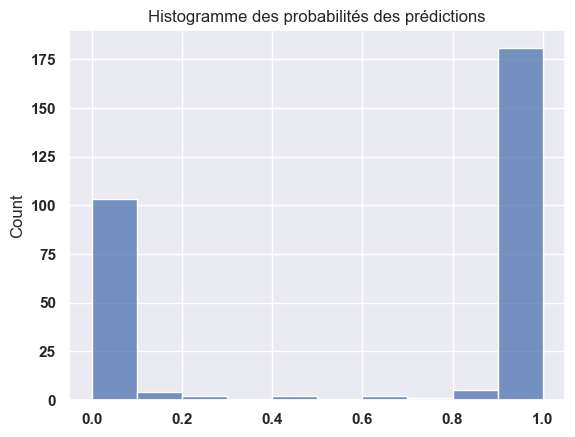

In [89]:
sns.set()
y_pred_proba = clf.predict_proba(X_test_std)[:,1]
sns.histplot(y_pred_proba)
plt.title("Histogramme des probabilités des prédictions")

**Le modèle est assez confiant de ses prédictions, car la plupart ont une probabilité proche de 0 ou de 1**

**Regardons maintenant la matrice de confusion**

In [91]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn ,tp = cm.reshape(-1)

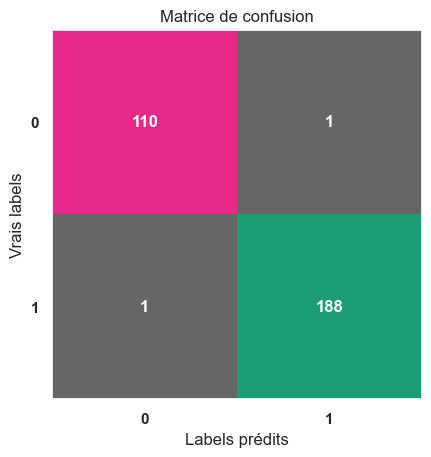

In [93]:
fig, ax = plt.subplots()
plt.imshow(cm, interpolation='nearest',cmap='Dark2_r')
plt.title("Matrice de confusion")
plt.xticks([0,1], [0,1])
plt.yticks([0,1], [0,1])
ax.grid(False)

# Loop over data dimensions and create text annotations
for i in range(0,2):
    for j in range(0,2):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="white")

plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

**Rappel : 0 = Faux billet   -    1 : Vrai billet**


In [95]:
print("- Nombre de vrais positifs :",tp)
print("- Nombre de vrais négatifs :",tn)
print("- Nombre de faux positifs :",fp)
print("- Nombre de faux négatifs :",fn)

- Nombre de vrais positifs : 188
- Nombre de vrais négatifs : 110
- Nombre de faux positifs : 1
- Nombre de faux négatifs : 1


In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       111
           1       0.99      0.99      0.99       189

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [99]:
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

Precision: 0.9947089947089947
Recall: 0.9947089947089947


Text(0.5, 1.0, 'ROC curve ou Fonction d’efficacité du récepteur')

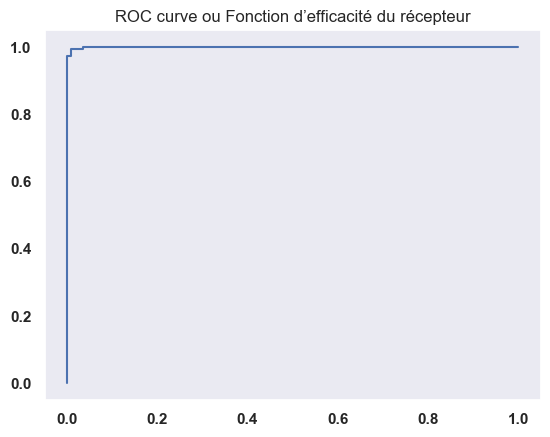

In [105]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.grid()
plt.title("ROC curve ou Fonction d’efficacité du récepteur")

**Plus la courbe se rapproche du coin en haut à gauche, plus l'AUC (Area Under Curve ROC) est proche de 1, meilleur est le modèle**


In [107]:
print("ROC-AUC", roc_auc_score(y_test, y_pred_proba))

ROC-AUC 0.999618666285333


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.2 - KNN : k-Nearest Neighbors </h3>
</div>

**Vérifions la standardisation effectuée au 4.0**

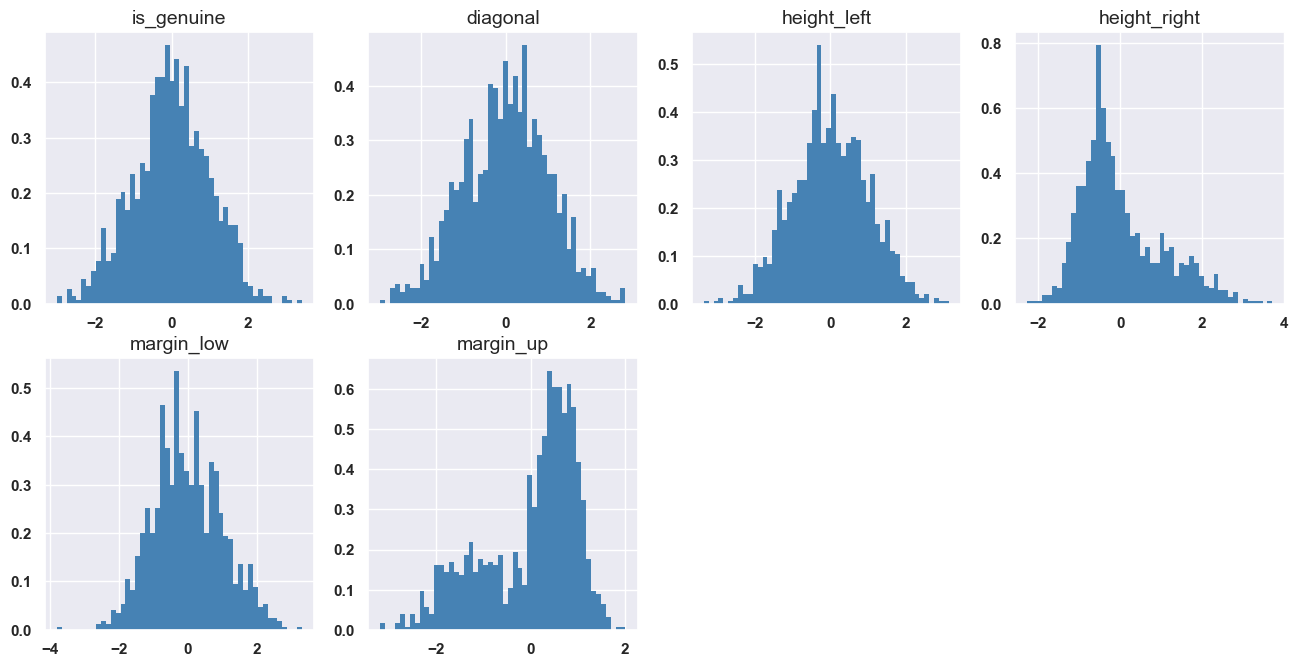

In [109]:
fig = plt.figure(figsize=(16, 12))
for feat_idx in range(X_train_std.shape[1]):
    ax = fig.add_subplot(3,4, (feat_idx+1))
    h = ax.hist(X_train_std[:, feat_idx], bins=50, color = 'steelblue', density=True, edgecolor='none')
    ax.set_title(df_complet.columns[feat_idx], fontsize=14)

**Nous allons maintenant utiliser la méthode "GridSearchCV" pour faire une validation croisée du paramètre k d’un kNN (le nombre de plus proches voisins) sur le jeu d’entraînement**

In [111]:
# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':[3, 5, 7, 9, 11, 13, 15]}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_train_std, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'], # score moyen
        clf.cv_results_['std_test_score'],  # écart-type du score
        clf.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )


Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 5}
Résultats de la validation croisée :
accuracy = 0.987 (+/-0.006) for {'n_neighbors': 3}
accuracy = 0.992 (+/-0.011) for {'n_neighbors': 5}
accuracy = 0.991 (+/-0.008) for {'n_neighbors': 7}
accuracy = 0.990 (+/-0.007) for {'n_neighbors': 9}
accuracy = 0.990 (+/-0.007) for {'n_neighbors': 11}
accuracy = 0.990 (+/-0.007) for {'n_neighbors': 13}
accuracy = 0.990 (+/-0.007) for {'n_neighbors': 15}


**Le modèle est le meilleur lorsque k = 5
Regardons maintenant la performance du modèle appliqué au jeu de test :**

In [113]:
y_pred = clf.predict(X_test_std)
print("accuracy",accuracy_score(y_test, y_pred))

accuracy 0.99


**Regardons les résultats (probabilité) des prédictions avant classification :**

Text(0.5, 1.0, 'Histogramme des probabilités des prédictions')

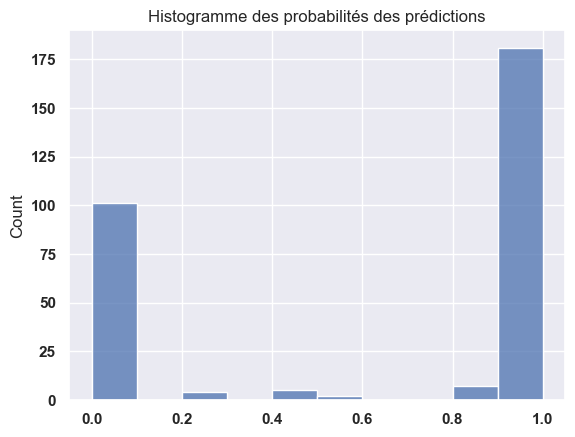

In [115]:
sns.set()
y_pred_proba = clf.predict_proba(X_test_std)[:,1]
sns.histplot(y_pred_proba)
plt.title("Histogramme des probabilités des prédictions")

**Le modèle est assez confiant de ses prédictions, car la plupart ont une probabilité proche de 0 ou de 1**

**On note cependant par rapport au modèle de régression logistique un plus grand nombre de probabilités proche du seuil de décision, cela peut induire plus d'erreurs de prédictions**

**Regardons maintenant la matrice de confusion**

In [117]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn ,tp = cm.reshape(-1)

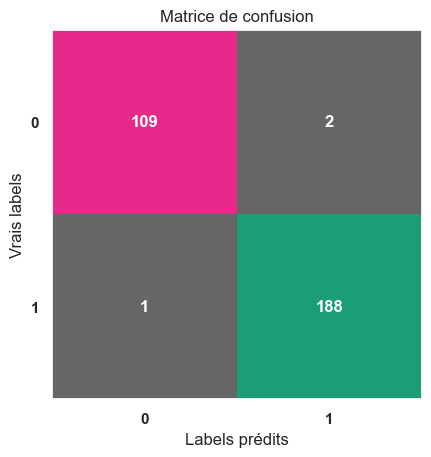

In [119]:
fig, ax = plt.subplots()
plt.imshow(cm, interpolation='nearest',cmap='Dark2_r')
plt.title("Matrice de confusion")
plt.xticks([0,1], [0,1])
plt.yticks([0,1], [0,1])
ax.grid(False)

# Loop over data dimensions and create text annotations
for i in range(0,2):
    for j in range(0,2):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="white")

plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

In [121]:
print("- Nombre de vrais positifs :",tp)
print("- Nombre de vrais négatifs :",tn)
print("- Nombre de faux positifs :",fp)
print("- Nombre de faux négatifs :",fn)

- Nombre de vrais positifs : 188
- Nombre de vrais négatifs : 109
- Nombre de faux positifs : 2
- Nombre de faux négatifs : 1


**Le nombre de faux positifs est plus élevé, alors que nous cherchons à minimiser surtout ce paramètre = (augmenter la précision):**

In [123]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       111
           1       0.99      0.99      0.99       189

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [125]:
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

Precision: 0.9894736842105263
Recall: 0.9947089947089947


Text(0.5, 1.0, 'ROC curve')

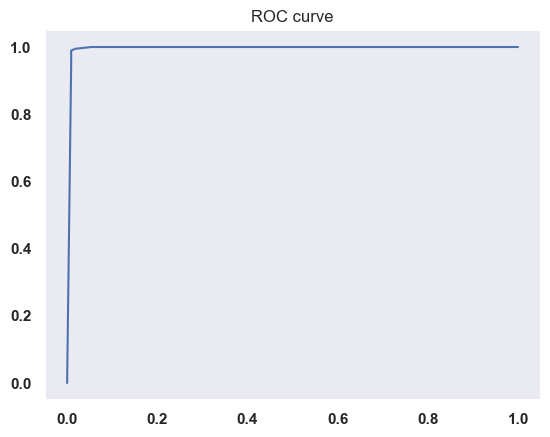

In [127]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.grid()
plt.title("ROC curve")

In [129]:
print("ROC-AUC", roc_auc_score(y_test, y_pred_proba))

ROC-AUC 0.9951141617808285


**Avec un score ROC_AUC >>0.99, ce moodèle est aussi très performant**

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.3 - K-means</h3>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.3.1 - Centrage et réduction des données </h4>
</div>

In [131]:
# On standardise l'ensemble du jeu de données (centrées et réduites)
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

#Affichons les moyennes et écarts-type des données centrées et réduites
X_scaled = pd.DataFrame(X_scaled,columns = X.columns, index = X.index)
X_scaled.describe().round(2).iloc[1:3:, : ]

,diagonal,height_left,height_right,margin_low,margin_up,length
mean,0.0,0.0,-0.0,-0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0


<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.3.2 - ACP Normée - Calcul et étude des composantes</h4>
</div>

**Comme il y a 6 variables décrivant le jeu de données, l'ACP a au maximum 6 composantes,
calculons-les puis affichons-les sous forme de tableau:**

In [133]:
n_components=6
pca = decomposition.PCA(n_components)
pca.fit(X_scaled)

PCA(n_components=6)

In [135]:
pcs = pca.components_

pcs = pd.DataFrame(pcs)

x_list = range(1, n_components+1)
list(x_list)

pcs.columns = X.columns
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2).T

,F1,F2,F3,F4,F5,F6
diagonal,0.08,0.94,-0.29,-0.10,-0.12,0.01
height_left,-0.33,0.31,0.88,-0.05,0.10,0.01
height_right,-0.39,0.11,-0.17,0.87,0.23,0.00
margin_low,-0.51,-0.07,-0.11,-0.09,-0.57,0.63
margin_up,-0.44,-0.00,-0.27,-0.44,0.71,0.18
length,0.53,0.05,0.15,0.18,0.30,0.76


**Utilisons le pourcentage de variance expliquée par chacune des composantes et le pourcentage cumulé**

In [137]:
#Combien de composantes utiliser?
#Utilisons le pourcentage de variance expliquée par chacune des composantes
scree = (pca.explained_variance_ratio_*100).round(2)
scree_cum = scree.cumsum().round()
scree_cum

array([ 43.,  60.,  73.,  85.,  95., 100.])

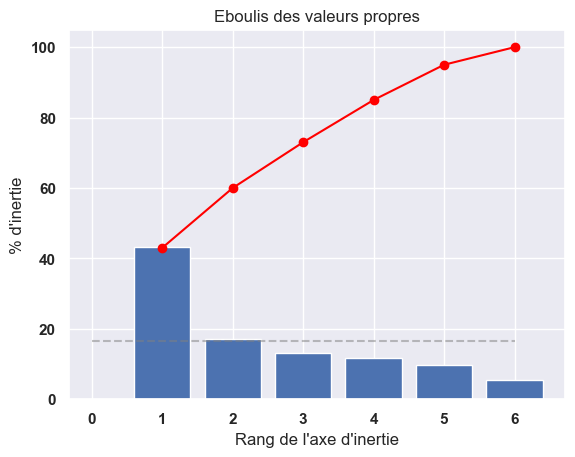

In [139]:
#Affichons-les
sns.set()

plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("Rang de l'axe d'inertie")
plt.ylabel("% d'inertie")
plt.title("Eboulis des valeurs propres")
plt.plot([0, n_components], [16.6, 16.6], color='grey', alpha=0.5,ls='--')
plt.show(block=False)

- Les 2 premières composantes expliquent 6O% de la variance des données initiales.

- Une composante expliquant moins de 16,6% de l'inertie totale (100/nb composantes) peut être écartée car elle n'engendre pas une perte d'information significative


**--> Retenons les 2 premières composantes principales**

<Axes: title={'center': 'Calcul des composantes'}>

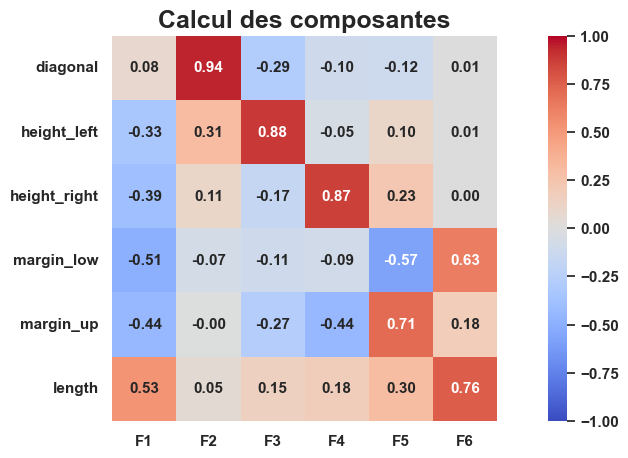

In [141]:
fig, ax = plt.subplots(figsize=(13, 5))
plt.rcParams.update({'font.size': 11,'font.weight':'bold'})
plt.xticks (fontsize = 11,fontweight ='bold')
plt.yticks (fontsize = 11,fontweight ='bold')
plt.title("Calcul des composantes", fontsize = 18,fontweight ='bold')
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f",square = True)

On constate pour les 2 premières composantes:
- **F1** est principalement correlée positivement à la **longueur**(0,53), et négativement à la **marge basse** (-0,51)
      

- **F2** est très fortement correlée positivement à la mesure **diagonale**(0,95) d'un billet.



<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.3.3 - Cercle des corrélations et projection des individus de test</h4>
</div>

In [143]:
#Projection: Calcul des coordonnées des individus dans le nouvel espace
X_proj = pca.transform(X_test_std)
X_proj = pd.DataFrame(X_proj, columns = ["F1", "F2","F3","F4","F5","F6"])
#X_proj[:5]

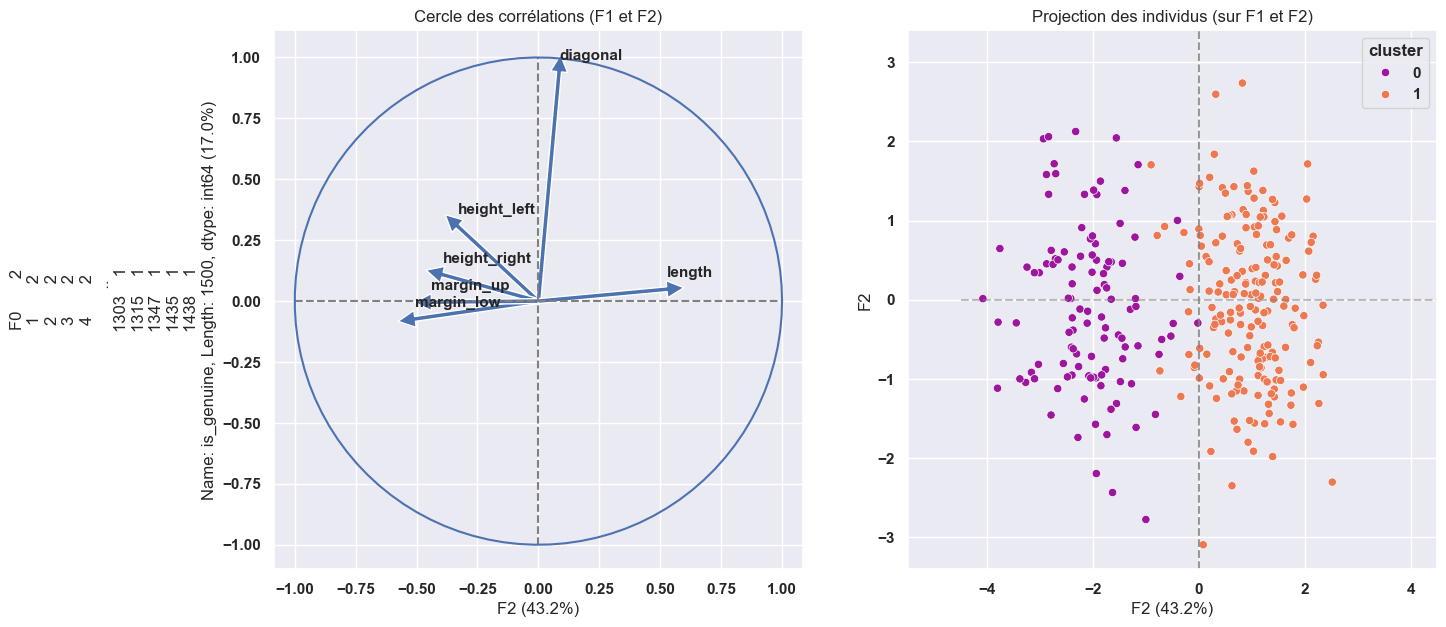

In [149]:
X_proj["cluster"] = y_test.values
############################
# Graphique des corrélations #
############################
 
a, o = 0,1 #Composantes F1, F2

features = pcs.columns

fig, ax = plt.subplots(1,2,figsize=(15, 7))

plt.subplot(1,2,1)

for i in range(0, pca.components_.shape[1]):
    ax[0].arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[a, i],  #0 for PCx+1
             pca.components_[o, i],  #1 for PCy+1
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[a, i],
             pca.components_[o, i] + 0.05,
             features[i])

# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[a],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[o],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(a+1, o+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')

 ##################################
# Projection des pays sur F1 et F2 #
##################################
plt.subplot(1,2,2)

# (Re)Transforme X_projected en np.array
X_ = np.array(X_proj)

sns.scatterplot(data=None, x=X_[:, a], y=X_[:, o],hue = X_proj["cluster"],palette ="plasma")

# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[a],1)))
plt.ylabel('F{}'.format(o+1))

# Valeur x max et y max
a_max = np.abs(X_[:, a]).max() *1.1
o_max = np.abs(X_[:, o]).max() *1.1
a_min = X_[:, a].min() *1.1

# On borne x et y 
ax[1].set_xlim(left=a_min-1, right=a_max)
ax[1].set_ylim(bottom= -o_max, top=o_max)

# Affichage des lignes horizontales et verticales
plt.plot([a_min, a_max], [0, 0], color='grey', alpha=0.5,ls='--')
plt.plot([0,0], [-o_max, o_max], color='grey', alpha=0.8,ls='--')

plt.title(f"Projection des individus (sur F{a+1} et F{o+1})")

plt.show()


***Commentaire***  
**On constate que la séparation entre les 2 types de billets est portée par F1, donc en premier par la longueur puis la marge inférieure**

<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.3.4 Choix du nombre de clusters </h4>
</div>

**Bien que nous souhaiterions intuitivement 2 clusters, il est possible de vérifier avec le coefficient de silhouette (prend en compte la densité des clusters et l'écart entre les différents clusters) le nombre de clusters le plus approprié.**   
Le coefficient de silhouette est compris entre -1 (mauvais) et 1 (excellent)

Text(0.5, 1.0, 'Coefficient de silhouette')

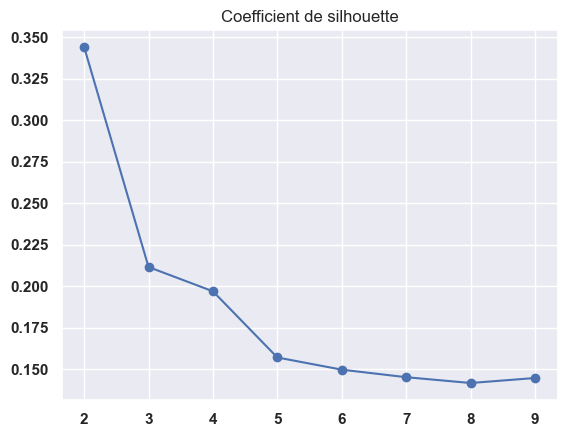

In [155]:
silhouettes = []
k_list = range(2, 10)
list(k_list)
for i in k_list :
  kmeans = KMeans(n_clusters=i, n_init= 30, random_state = 42)
  kmeans.fit(X_train_std) 
  silh = metrics.silhouette_score(X_train_std,kmeans.labels_)
  silhouettes.append(silh)
    
#Affichage des résultats
plt.plot(range(2,10), silhouettes, marker = "o")
plt.title("Coefficient de silhouette")

**Le coefficient de silhouette est bien le plus élevé pour 2 clusters**

<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.3.5 Entrainement et prédiction du K Means </h4>
</div>

In [157]:
model = KMeans(n_clusters=2, n_init= 30, random_state = 42)
model.fit(X_train_std)

KMeans(n_clusters=2, n_init=30, random_state=42)

In [159]:
y_pred = model.predict(X_test_std)

In [161]:
#Calcul, fit et transform des centroïdes
centroids = model.cluster_centers_
centroids_scaled = scaler.fit_transform(centroids)

#Projection: Calcul des coordonnées des individus dans le nouvel espace
X_proj = pca.transform(X_test_std)
X_proj = pd.DataFrame(X_proj, columns = ["F1", "F2","F3","F4","F5","F6"])

#Coordonnées de projection des centroïdes pour les afficher avec les clusters
centroids_proj = pca.transform(centroids_scaled)
centroids_proj = pd.DataFrame(centroids_proj, 
                              columns = ["F1", "F2", "F3", "F4","F5","F6"], 
                              index=["cluster_0","cluster_1"
                                    ])

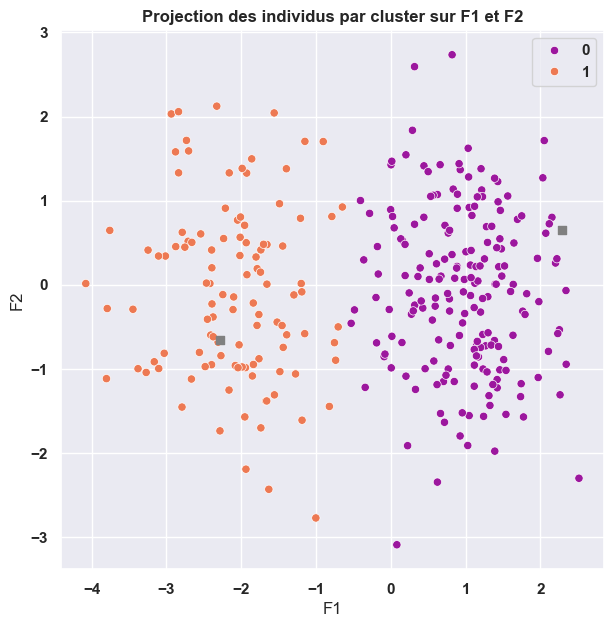

In [163]:
#Association des pays aux clusters
X_proj["cluster"] = y_pred

fig, ax = plt.subplots(figsize=(7, 7))

#Projection sur F1 et F2
plt.subplot(1,1,1)
sns.scatterplot(data=X_proj,x =X_proj.iloc[:, 0], y=X_proj.iloc[:, 1], hue = "cluster", palette = "plasma")
plt.scatter(centroids_proj.iloc[:, 0], centroids_proj.iloc[:, 1],  marker="s", c="grey")
plt.xlabel("F1")
plt.ylabel("F2")
plt.title("Projection des individus par cluster sur F1 et F2", fontweight = "bold")
plt.legend()

plt.show()


In [165]:
# Match categories de kmeans avec les bonnes categories du dataset
for i in range (len(y_pred)) :
    if y_pred[i] == 0 :
        y_pred[i] = 1 
    else :
        y_pred[i] = 0 

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn ,tp = cm.reshape(-1)

**Caratérisation des centroïdes**

In [167]:
centroids=pd.DataFrame(centroids,columns = X.columns)
centroids

,diagonal,height_left,height_right,margin_low,margin_up,length
0,0.099936,-0.270352,-0.342631,-0.539349,-0.409702,0.583224
1,-0.211553,0.572303,0.725311,1.141740,0.867290,-1.234617


**Caractérisation des centroïdes :**  
**- Cluster 0 (vrais billets) :** longueur et diagonale positive = position à droite et en haut  
**- Cluster 1 (faux billets) :** les signes sont inversés = position à gauche et en bas. les marges inférieure et supérieure, les hauteurs droite et gauche sont plus grandes pour les faux billets

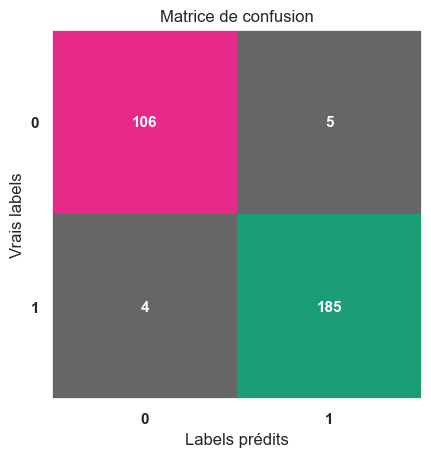

In [169]:
fig, ax = plt.subplots()
plt.imshow(cm, interpolation='nearest',cmap='Dark2_r')
plt.title("Matrice de confusion")
plt.xticks([0,1], [0,1])
plt.yticks([0,1], [0,1])
ax.grid(False)

# Loop over data dimensions and create text annotations
for i in range(0,2):
    for j in range(0,2):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="white")

plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

In [171]:
print("- Nombre de vrais positifs :",tp)
print("- Nombre de vrais négatifs :",tn)
print("- Nombre de faux positifs :",fp)
print("- Nombre de faux négatifs :",fn)

- Nombre de vrais positifs : 185
- Nombre de vrais négatifs : 106
- Nombre de faux positifs : 5
- Nombre de faux négatifs : 4


In [173]:
print("accuracy",accuracy_score(y_test, y_pred))

accuracy 0.97


In [175]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       111
           1       0.97      0.98      0.98       189

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [382]:
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

Precision: 0.9736842105263158
Recall: 0.9788359788359788


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.4 - Random Forest </h3>
</div>

**Regardons comment évolue le score de notre classification du stade de développement en accroissant le nombre d'arbres**  
**On ne contraint pas la profondeur d'un arbre. Le nombre d'arbres dans la forêt varie de 1 à 200**

In [177]:
tree_counts = [1,2,3,4,5,10,15,20,25,30,40,50, 60, 70, 80, 90, 100, 110, 120, 150,200]

accuracy  = []
for n_estimator in tree_counts:
    clf = RandomForestClassifier(
        n_estimators = n_estimator,
        max_depth = None,
        max_features = None,
        random_state = 42
        )

    clf.fit(X_train, y_train)
    accuracy.append({
        'n': n_estimator,
        'test': clf.score(X_test, y_test),
        'train': clf.score(X_train, y_train),
    })

    print(f"{n_estimator} trees  \t accuracy train {np.round(clf.score(X_train, y_train), 3)} \t accuracy test: {np.round(clf.score(X_test, y_test), 3)}", )


accuracy = pd.DataFrame(accuracy)
accuracy['delta'] = np.abs(accuracy.train - accuracy.test)

1 trees  	 accuracy train 0.994 	 accuracy test: 0.983
2 trees  	 accuracy train 0.994 	 accuracy test: 0.983
3 trees  	 accuracy train 0.998 	 accuracy test: 0.987
4 trees  	 accuracy train 0.998 	 accuracy test: 0.987
5 trees  	 accuracy train 0.999 	 accuracy test: 0.987
10 trees  	 accuracy train 0.999 	 accuracy test: 0.987
15 trees  	 accuracy train 0.999 	 accuracy test: 0.99
20 trees  	 accuracy train 0.999 	 accuracy test: 0.99
25 trees  	 accuracy train 0.999 	 accuracy test: 0.99
30 trees  	 accuracy train 0.999 	 accuracy test: 0.99
40 trees  	 accuracy train 1.0 	 accuracy test: 0.99
50 trees  	 accuracy train 1.0 	 accuracy test: 0.99
60 trees  	 accuracy train 1.0 	 accuracy test: 0.99
70 trees  	 accuracy train 1.0 	 accuracy test: 0.99
80 trees  	 accuracy train 1.0 	 accuracy test: 0.99
90 trees  	 accuracy train 1.0 	 accuracy test: 0.99
100 trees  	 accuracy train 1.0 	 accuracy test: 0.99
110 trees  	 accuracy train 1.0 	 accuracy test: 0.99
120 trees  	 accuracy t

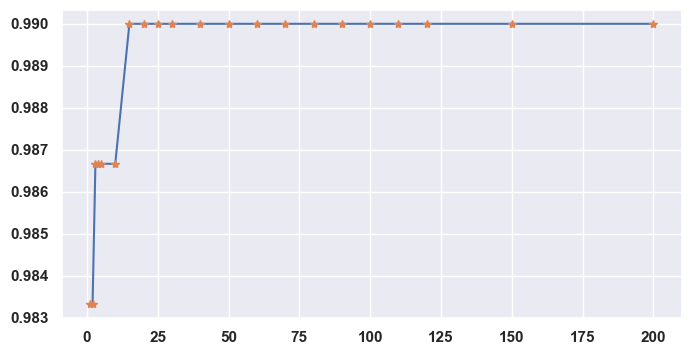

In [179]:
fig = plt.figure(figsize=(8,4))
plt.plot(accuracy.n, accuracy.test, label = 'score test')
plt.plot(accuracy.n, accuracy.test,'*')

plt.show()

**A partir de 15 arbres la performance du classifieur plafonne à 0,99**

**Entraînons une forêt aléatoire en fixant le nombre d'arbres à 20:**

In [183]:
clf = RandomForestClassifier(
    n_estimators = 20,
    random_state = 42
    )
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=42)

In [185]:
y_pred = clf.predict(X_test)
print("accuracy",accuracy_score(y_test, y_pred))

accuracy 0.9933333333333333


In [187]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       111
           1       0.99      0.99      0.99       189

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [189]:
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

Precision: 0.9947089947089947
Recall: 0.9947089947089947


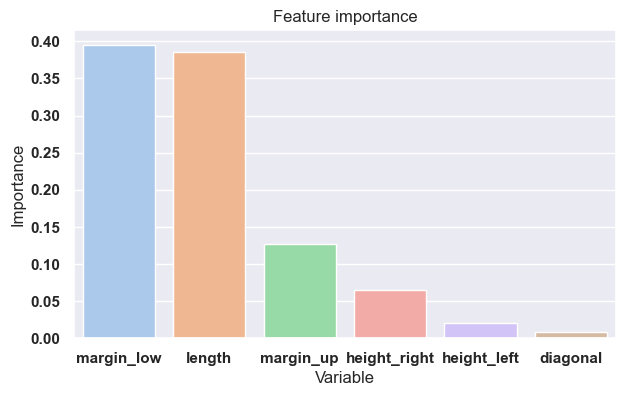

In [191]:
df_feat = pd.DataFrame()
df_feat['feature'] = X.columns
df_feat['importance'] = clf.feature_importances_
df_feat.sort_values(by = 'importance', ascending = False, inplace = True)

fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(1, 1, 1)

sns.barplot(data = df_feat, x='feature', y='importance', palette = "pastel")
ax.set_title('Feature importance')
ax.set_xlabel('Variable')
ax.set_ylabel('Importance')
plt.show()

**L'algorithme indique la marge inférieure comme variable dominante puis la longueur du billet**

In [194]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn ,tp = cm.reshape(-1)

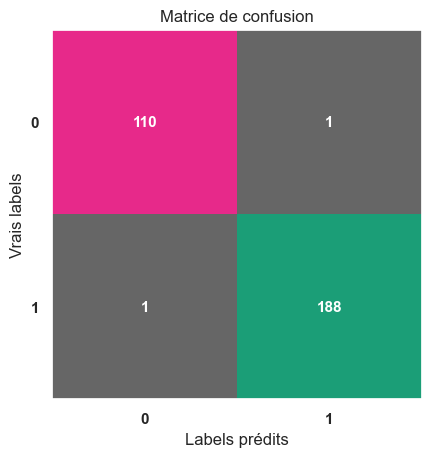

In [196]:
fig, ax = plt.subplots()
plt.imshow(cm, interpolation='nearest',cmap='Dark2_r')
plt.title("Matrice de confusion")
plt.xticks([0,1], [0,1])
plt.yticks([0,1], [0,1])
ax.grid(False)

# Loop over data dimensions and create text annotations
for i in range(0,2):
    for j in range(0,2):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="white")

plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

In [198]:
print("- Nombre de vrais positifs :",tp)
print("- Nombre de vrais négatifs :",tn)
print("- Nombre de faux positifs :",fp)
print("- Nombre de faux négatifs :",fn)

- Nombre de vrais positifs : 188
- Nombre de vrais négatifs : 110
- Nombre de faux positifs : 1
- Nombre de faux négatifs : 1


**Le modèle a exactement les mêmes performances que la régression logistique**

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Comparaison des Algorithmes </h2>
</div>

In [201]:
Recap = [["Régression Logistique",0.9933,0.9947,0.99],
         ["KNN",0.99,0.9947,0.99],
         ["K-Means",0.97,0.9736,0.97],
         ["Random Forest",0.9933,0.9947,0.99]
        ]
Recap = pd.DataFrame(Recap, columns = ["Modèle","Accuracy","Précision","F-Score"])
Recap

,Modèle,Accuracy,Précision,F-Score
0,Régression Logistique,0.9933,0.9947,0.99
1,KNN,0.9900,0.9947,0.99
2,K-Means,0.9700,0.9736,0.97
3,Random Forest,0.9933,0.9947,0.99


**--> Les 2 modèles de Regression Logistique et Random Forest ont les mêmes performances sur ce jeu de données, nous mettrons en production l'algorithme Régression Logistique car plus simple et donc nécessitant moins de ressources**